# Análise Exploratória de dados do e-commerce brasileiro entre os anos de  2016 a 2018

A base de dados reúne dados do e-commerce brasileiro dos anos de 2016 a 2018, disponibilizada pela empresa Olist. A Olist é uma empresa brasileira que atua no setor de varejo, oferecendo serviços de gestão para lojas off-line e online ferramentas de aceleração de vendas.

Do conjunto de 9 tabelas que compõem a base de dados, a presente análise irá explorar as tabelas abaixo:

- pedidos (olist_orders_dataset)
- itens dos pedidos (olist_order_items_dataset)
- detalhes do consumidor que fez os pedidos (olist_customers_dataset)
- detalhes de pagamento dos pedidos (olist_order_payments_dataset)
- review dos usuários sobre os pedidos (olist_order_reviews_dataset)

## Coleta de dados

In [75]:
# importando bibliotecas e pacotes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# carregando a tabela 'olist_orders_dataset'

df_pedidos = pd.read_csv('dados_brutos/olist_orders_dataset.csv')
df_pedidos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Do dataframe 'pedidos', iremos utilizar as seguintes colunas:

- **order_id**: Identificador do pedido
- **customer_id**: Identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de consumidor
- **order_status**: Status do pedido
- **order_purchase_timestamp**: data/hora do horário que a compra foi feita
- **order_delivered_customer_date**: data/hora do horário que a compra foi entregue ao cliente

In [77]:
# carregando a tabela 'olist_order_items_dataset'

df_itens_pedidos = pd.read_csv('dados_brutos/olist_order_items_dataset.csv')
df_itens_pedidos.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Do dataframe 'itens pedidos', iremos utilizar as seguintes colunas:

- **order_id**: identificador do pedido. Será a nossa chave com a tabela de pedidos
- **product_id**: identificador do produto
- **seller_id**: identificador do vendedor
- **shipping_limit_date**: data/hora limite para a entrega do pedido
- **price**: valor do pedido
- **freight_value**: valor do frete

In [78]:
# carregando a tabela 'olist_customers_dataset'

df_consumidor = pd.read_csv('dados_brutos/olist_customers_dataset.csv')
df_consumidor.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Do dataframe 'consumidor', iremos utilizar as seguintes colunas:

- **customer_id**: identificador do cliente. Essa coluna é importante pois será a nossa chave com a tabela de pedidos. 
- **customer_state**: estado
- **customer_city**: cidade

In [79]:
# carregando a tabela 'olist_order_payments_dataset'

df_pagamento = pd.read_csv('dados_brutos/olist_order_payments_dataset.csv')
df_pagamento.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Do dataframe 'pagamento', iremos utilizar as seguintes colunas:

- **order_id**: identificador do pedido. Será a nossa chave com a tabela de pedidos
- **payment_type**: forma de pagamento
- **payment_value**: valor pago

In [80]:
# carregando a tabela 'olist_order_reviews_dataset'

df_review = pd.read_csv('dados_brutos/olist_order_reviews_dataset.csv')
df_review.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Do dataframe 'review', iremos utilizar as seguintes colunas:

- **order_id**: identificador do pedido
- **review_score**: nota atribuída ao pedido
- **review_creation_date**: data/hora que a nota foi atribuída

## Processamento dos dados

##### DF pedidos

In [81]:
# verificando os tipos das colunas e a presença de dados nulos

df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Existem dados nulos nas colunas de datas sobre os pedidos, pois nem todo pedido realizado foi finalizado. Para essa análise utilizaremos apenas o conjunto de pedidos finalizados.

In [82]:
# verificando os rótulos da coluna 'order_status'

df_pedidos['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

Manteremos apenas os pedidos com rótulo 'delivered'.

In [83]:
# filtrando apenas os pedidos finalizados e salvando no df

df_pedidos = df_pedidos.loc[df_pedidos['order_status'] == 'delivered']
df_pedidos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [84]:
# reordenando o índice do df

df_pedidos = df_pedidos.reset_index(drop=True)
df_pedidos

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
96473,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
96474,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
96475,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
96476,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [85]:
# excluindo as colunas que não serão utilizadas

columns_drop = ['order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date']
df_pedidos = df_pedidos.drop(columns_drop, axis=1)
df_pedidos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29


In [86]:
# convertendo as colunas de data estão como string, faremos a converção para conseguir manipular elas

df_pedidos['order_purchase_timestamp'] = pd.to_datetime(df_pedidos['order_purchase_timestamp'])
df_pedidos['order_delivered_customer_date'] = pd.to_datetime(df_pedidos['order_delivered_customer_date'])
df_pedidos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29


In [87]:
# desmenbrando a coluna 'order_purchase_timestamp' em hora e data

# coluna 'hora_pedido'
df_pedidos['hora_pedido'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%H:%M:%S')

# Coluna 'data_pedido'
df_pedidos['data_pedido'] = df_pedidos['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

df_pedidos.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,20:41:37,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,08:38:49,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,19:28:06,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,21:18:39,2018-02-13


##### DF itens_pedidos

In [88]:
# verificando o tipo das colunas e a presença de dados nulos

df_itens_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Não existem dados nulos. No entanto, não sabemos se constam apenas os itens dos pedidos finalizados.

In [89]:
# excluindo as colunas que não serão utilizadas

df_itens_pedidos = df_itens_pedidos.drop('order_item_id', axis=1)
df_itens_pedidos.head(3)

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


##### DF consumidor

In [90]:
# verificando o tipo das colunas e a presença de dados nulos

df_consumidor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Não existem dados nulos.

In [91]:
# excluindo as colunas que não serão utilizadas

columns_drop = ['customer_unique_id', 'customer_zip_code_prefix']
df_consumidor = df_consumidor.drop(columns_drop, axis=1)
df_consumidor.head(3)

,customer_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP


In [92]:
# verificando os rótulos da coluna 'customer_state'

df_consumidor['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

In [93]:
# classificando a coluna 'customer_state' por região

df_consumidor.loc[(df_consumidor['customer_state'] == 'PB') | (df_consumidor['customer_state'] == 'CE') | (df_consumidor['customer_state'] == 'RN') | (df_consumidor['customer_state'] == 'SE')
       | (df_consumidor['customer_state'] == 'PE') | (df_consumidor['customer_state'] == 'MA') | (df_consumidor['customer_state'] == 'AL') | (df_consumidor['customer_state'] == 'BA')
       | (df_consumidor['customer_state'] == 'PI'),'customer_regiao'] = 'Nordeste'
df_consumidor.loc[(df_consumidor['customer_state'] == 'PA') | (df_consumidor['customer_state'] == 'TO') | (df_consumidor['customer_state'] == 'AM') | (df_consumidor['customer_state'] == 'RO')
       | (df_consumidor['customer_state'] == 'RR') | (df_consumidor['customer_state'] == 'AP') | (df_consumidor['customer_state'] == 'AC'),'customer_regiao'] = 'Norte'
df_consumidor.loc[(df_consumidor['customer_state'] == 'MG') | (df_consumidor['customer_state'] == 'SP') | (df_consumidor['customer_state'] == 'RJ') | (df_consumidor['customer_state'] == 'ES'), 'customer_regiao'] = 'Sudeste'
df_consumidor.loc[(df_consumidor['customer_state'] == 'RS') | (df_consumidor['customer_state'] == 'SC') | (df_consumidor['customer_state'] == 'PR'),'customer_regiao'] = 'Sul'
df_consumidor.loc[(df_consumidor['customer_state'] == 'GO') | (df_consumidor['customer_state'] == 'DF') | (df_consumidor['customer_state'] == 'MT') | (df_consumidor['customer_state'] == 'MS'),'customer_regiao'] = 'Centro-Oeste'

df_consumidor.head(5)

C:\Users\Delson\AppData\Local\Temp\ipykernel_6236\1813426313.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nordeste' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_consumidor.loc[(df_consumidor['customer_state'] == 'PB') | (df_consumidor['customer_state'] == 'CE') | (df_consumidor['customer_state'] == 'RN') | (df_consumidor['customer_state'] == 'SE')


,customer_id,customer_city,customer_state,customer_regiao
0,06b8999e2fba1a1fbc88172c00ba8bc7,franca,SP,Sudeste
1,18955e83d337fd6b2def6b18a428ac77,sao bernardo do campo,SP,Sudeste
2,4e7b3e00288586ebd08712fdd0374a03,sao paulo,SP,Sudeste
3,b2b6027bc5c5109e529d4dc6358b12c3,mogi das cruzes,SP,Sudeste
4,4f2d8ab171c80ec8364f7c12e35b23ad,campinas,SP,Sudeste


##### DF pagamento

In [94]:
# verificando o tipo das colunas e a presença de dados nulos

df_pagamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Não existem dados nulos. No entanto, não sabemos se constam apenas os pagamentos dos pedidos finalizados.

In [95]:
# excluindo as colunas que não serão utilizadas

columns_drop = ['payment_sequential', 'payment_installments']
df_pagamento = df_pagamento.drop(columns_drop, axis=1)
df_pagamento.head(3)

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,65.71


In [96]:
# verificando os rótulos da coluna 'payment_type'

df_pagamento['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [97]:
# renomeando os rótulos da coluna 'payment_type'

df_pagamento = df_pagamento.replace({'credit_card': 'cartão crédito', 'debit_card': 'cartão débito', 'not_defined': 'outros'})
df_pagamento

,order_id,payment_type,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,cartão crédito,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,cartão crédito,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,cartão crédito,65.71
3,ba78997921bbcdc1373bb41e913ab953,cartão crédito,107.78
4,42fdf880ba16b47b59251dd489d4441a,cartão crédito,128.45
...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,363.31
103882,7b905861d7c825891d6347454ea7863f,cartão crédito,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,cartão crédito,47.77
103884,b8b61059626efa996a60be9bb9320e10,cartão crédito,369.54


##### DF review

In [98]:
# verificando o tipo das colunas e a presença de dados nulos

df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Existem dados nulos, pois nem toda avaliação possui comentário.

In [99]:
# excluindo as colunas que não serão utilizadas

columns_drop = ['review_id', 'review_comment_title','review_comment_message', 'review_answer_timestamp']
df_review = df_review.drop(columns_drop, axis=1)
df_review.head(3)

,order_id,review_score,review_creation_date
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00


In [100]:
# convertendo a colunas de data que estão como string, faremos a converção para conseguir manipular elas

df_review['review_creation_date'] = pd.to_datetime(df_review['review_creation_date'])
df_review.head(3)

,order_id,review_score,review_creation_date
0,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18
1,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10
2,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17


## União das tabelas

In [101]:
df_olist = pd.merge(df_pedidos, df_itens_pedidos, on='order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,20:41:37,2018-07-24,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,08:38:49,2018-08-08,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,19:28:06,2017-11-18,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,21:18:39,2018-02-13,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,12:58:58,2018-02-06,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,14:46:43,2017-08-27,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59


In [102]:
df_olist = pd.merge(df_olist, df_consumidor, on = 'customer_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido,product_id,seller_id,shipping_limit_date,price,freight_value,customer_city,customer_state,customer_regiao
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,20:41:37,2018-07-24,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,Nordeste
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,08:38:49,2018-08-08,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,Centro-Oeste
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,19:28:06,2017-11-18,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,sao goncalo do amarante,RN,Nordeste
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,21:18:39,2018-02-13,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,santo andre,SP,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110192,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,12:58:58,2018-02-06,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,praia grande,SP,Sudeste
110193,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,14:46:43,2017-08-27,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,nova vicosa,BA,Nordeste
110194,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste
110195,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste


In [103]:
df_olist = pd.merge(df_olist, df_pagamento, on = 'order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido,product_id,seller_id,shipping_limit_date,price,freight_value,customer_city,customer_state,customer_regiao,payment_type,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,cartão crédito,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,20:41:37,2018-07-24,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,Nordeste,boleto,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,08:38:49,2018-08-08,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,Centro-Oeste,cartão crédito,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115030,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,12:58:58,2018-02-06,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,praia grande,SP,Sudeste,cartão crédito,195.00
115031,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,14:46:43,2017-08-27,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,nova vicosa,BA,Nordeste,cartão crédito,271.01
115032,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste,cartão crédito,441.16
115033,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste,cartão crédito,441.16


In [104]:
df_olist = pd.merge(df_olist, df_review, on = 'order_id')
df_olist

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido,product_id,seller_id,shipping_limit_date,price,freight_value,customer_city,customer_state,customer_regiao,payment_type,payment_value,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,cartão crédito,18.12,4,2017-10-11
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,2.00,4,2017-10-11
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,18.59,4,2017-10-11
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,20:41:37,2018-07-24,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,barreiras,BA,Nordeste,boleto,141.46,4,2018-08-08
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,08:38:49,2018-08-08,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,vianopolis,GO,Centro-Oeste,cartão crédito,179.12,5,2018-08-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,12:58:58,2018-02-06,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,praia grande,SP,Sudeste,cartão crédito,195.00,4,2018-03-01
114855,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,14:46:43,2017-08-27,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,nova vicosa,BA,Nordeste,cartão crédito,271.01,5,2017-09-22
114856,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste,cartão crédito,441.16,2,2018-01-26
114857,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,21:28:27,2018-01-08,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,japuiba,RJ,Sudeste,cartão crédito,441.16,2,2018-01-26


In [105]:
# exportando a base final

df_olist.to_csv('base_final_olist.csv', index=False)

## Análise e visualização de dados

- Qual a porcentagem de pedidos por região?
- Quais as 5 cidades com maior percentual de pedidos?
- Qual é o valor médio do frete por regiao?
- Qual é o volume de compras por mês? E por hora?
- Qual é o tipo de pagamento mais utilizado ao longo dos anos?
- Qual é o faturamento por região?
- Qual é o nível médio de satisfação por região?

In [106]:
# carregando a base final para análise

df_olist = pd.read_csv('base_final_olist.csv')
df_olist.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,hora_pedido,data_pedido,product_id,seller_id,shipping_limit_date,price,freight_value,customer_city,customer_state,customer_regiao,payment_type,payment_value,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,cartão crédito,18.12,4,2017-10-11 00:00:00
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,2.00,4,2017-10-11 00:00:00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,10:56:33,2017-10-02,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,sao paulo,SP,Sudeste,voucher,18.59,4,2017-10-11 00:00:00


In [107]:
# visualizando 

df_olist.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,114859,95831,895ab968e7bb0d5659d16cd74cd1650c,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,114859,95831,270c23a11d024a44c896d1894b261a83,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,114859,1,delivered,114859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,114859,95316,2017-08-08 20:26:31,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,114851,95015,2017-08-14 12:46:18,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hora_pedido,114859,50005,20:26:31,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_pedido,114859,611,2017-11-24,1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,114859,32072,aca2eb7d00ea1a7b8ebd4e68314663af,526,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,114859,2965,4a3ca9315b744ce9f8e9374361493884,2093,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,114859,90757,2017-08-14 20:43:31,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Qual a porcentagem de pedidos por região?

In [108]:
# criando um df com a contagem dos pedidos por região

df_pedidos_regiao = df_olist['customer_regiao'].value_counts()
df_pedidos_regiao

customer_regiao
Sudeste         78993
Sul             16484
Nordeste        10596
Centro-Oeste     6706
Norte            2080
Name: count, dtype: int64

A região Sudeste é responsável por mais da metade dos pedidos.

In [117]:
# visualizando a contagem em porcentagem

df_pedidos_regiao_perc = df_olist['customer_regiao'].value_counts(normalize=True)*100
df_pedidos_regiao_perc

customer_regiao
Sudeste         68.773888
Sul             14.351509
Nordeste         9.225224
Centro-Oeste     5.838463
Norte            1.810916
Name: proportion, dtype: float64

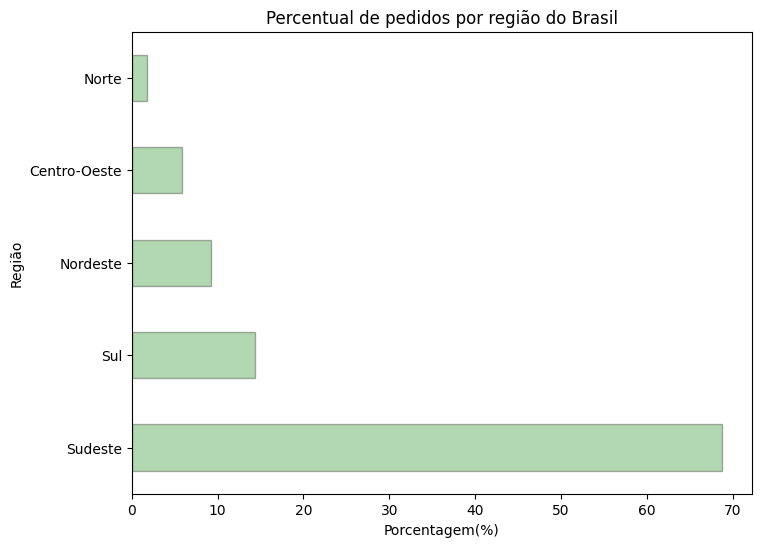

In [180]:
plt.figure(figsize=(8, 6))

df_pedidos_regiao_perc.plot.barh(color='g', ec = 'k', alpha = 0.3)

plt.title('Percentual de pedidos por região do Brasil')
plt.xlabel('Porcentagem(%)')
plt.ylabel('Região')

plt.show() 

### Quais as 5 cidades com maior percentual de pedidos?

In [133]:
# criando um dataframe com as cidades com maior quantidade de pedidos

df_pedidos_cidade = df_olist['customer_city'].value_counts().head(5)
df_pedidos_cidade

customer_city
sao paulo         18168
rio de janeiro     7914
belo horizonte     3195
brasilia           2413
curitiba           1784
Name: count, dtype: int64

In [134]:
# visualizando a contagem em percentual

df_pedidos_cidade_perc = df_olist['customer_city'].value_counts(normalize=True)*100
df_pedidos_cidade_top5 = df_pedidos_cidade_perc.head(5)
df_pedidos_cidade_top5

customer_city
sao paulo         15.817655
rio de janeiro     6.890187
belo horizonte     2.781671
brasilia           2.100837
curitiba           1.553209
Name: proportion, dtype: float64

In [139]:
# renomeando o nome das cidades

df_pedidos_cidade_top5.rename({'sao paulo': 'São Paulo',
                               'rio de janeiro': 'Rio de Janeiro',
                               'belo horizonte': 'Belo Horizonte',
                               'brasilia': 'Brasília',
                               'curitiba': 'Curitiba'},
                               inplace=True)
df_pedidos_cidade_top5

customer_city
São Paulo         15.817655
Rio de Janeiro     6.890187
Belo Horizonte     2.781671
Brasília           2.100837
Curitiba           1.553209
Name: proportion, dtype: float64

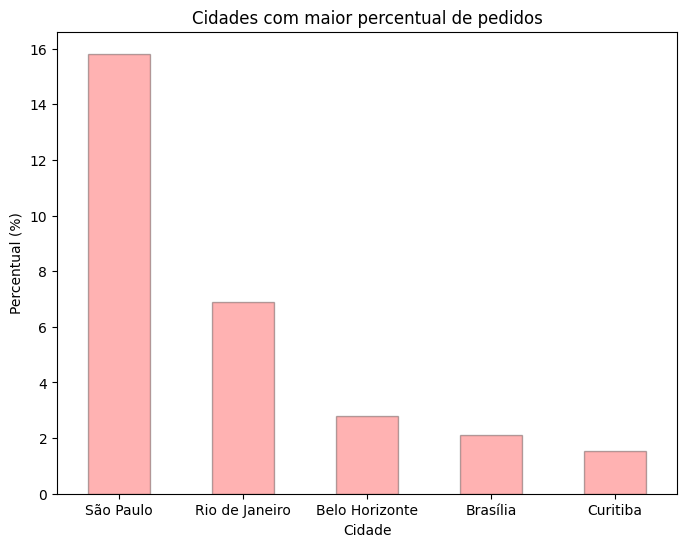

In [182]:
plt.figure(figsize=(8, 6))

df_pedidos_cidade_top5.plot.bar(color='r', ec = 'k', alpha = 0.3)

plt.xticks(rotation=360)
plt.title('Cidades com maior percentual de pedidos')
plt.xlabel('Cidade')
plt.ylabel('Percentual (%)')

plt.show()

### Qual é o valor médio do frete por região?

In [152]:
df_media_frete = df_olist['freight_value'].mean()
df_media_frete

19.97453869526985

A média geral do valor do frete é de R$ 19,97.

In [165]:
df_media_frete_regiao = df_olist.groupby(['customer_regiao'])['freight_value'].agg(['mean']).sort_values(by='mean', ascending=False)
df_media_frete_regiao

,mean
customer_regiao,
Norte,37.093582
Nordeste,32.128549
Centro-Oeste,23.006543
Sul,21.207395
Sudeste,17.378783


As regiões Norte e Nordeste possuem os fretes mais caros, R$ 37,09 e R$ 32,12, respectivamente.

<Figure size 800x600 with 0 Axes>

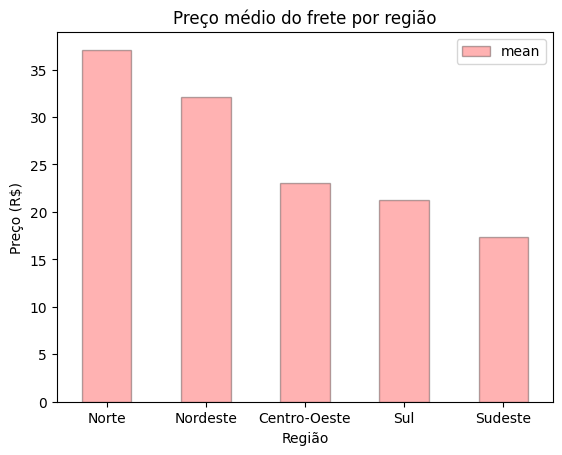

In [181]:
plt.figure(figsize=(8, 6))

df_media_frete_regiao.plot.bar(color='r', ec = 'k', alpha = 0.3)

plt.xticks(rotation=360)
plt.title('Preço médio do frete por região')
plt.xlabel('Região')
plt.ylabel('Preço (R$)')

plt.show()